# DS 3000 - Assignment 3

**Student Name**: Brian Wong

**Date**: 1/22/2025


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Data Science Problem (50 pts)
### Instructions

You are hired as a Data Scientist for the NYC Taxi and Limousine Commission (TLC) and this company routinely collects trip data from all licensed cabs in NY. Your team would like to use this data in the future to understand how New Yorkers use these taxis. Your first assignment is to **analyze the data of the Green Taxis, and determine if its a viable source.**

Your supervisor has requested that you perform your analysis using data from December 2023 and would like for you to present your findings during the next team meeting. Use a Jupyter notebook to explain your data wrangling and analytical steps to your colleagues. 

**Data & Documentation**

- **Data Source:** https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-12.parquet
- **Data Dictionary:** [Green Trips Data Dictionary](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf).

The TLC trip record data and a description of the initiative can be found at the following link: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

**`Note:`** Ensure that you explain the results from each question.


**In this assignment you will use the Pandas library. Pandas allows us to load data that's stored in a various formats, e.g. excel, csv, txt, parquet, etc. In this assignment, you will learn to read data in parquet format which is one of the preferred formats when working with `Big Data`. [Click here to learn more about parquet files](https://towardsdatascience.com/csv-files-for-storage-no-thanks-theres-a-better-option-72c78a414d1d)**

I also provided starter code below to help you to read the data in parquet format. First, you'll need to install a new library called *fastparquet*.

In [3]:
#run this cell to install the fast parquet library
!pip install fastparquet

In [4]:
import pandas as pd

## 1. Load the data
Load the NYC Green Taxi Trip Records data directly from the URL into a data frame called tripdata_df. 

In [6]:
#let's load the data into a dataframe

tripdata_df = pd.read_parquet(path = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-12.parquet', #provide the URL to the data source
                      engine = 'fastparquet')

#Note: you'll notice two new things. 1) We are using a new function called `read_parquet()` which indicates that we are 
#      reading data in parquet format. 2) We used the fastparquet library as the engine. 
#      That's it! Pandas will load the data into a dataframe. You can now use the dataframe for EDA.

# Reminder: How does Pandas read other file formats?
# 1. Excel files: pd.read_excel()
# 2. CSV Files: pd.read_csv()
# ... and now you know how to read parquet files using pd.read_parquet()


## 2. Inspect the Data (5 pts) 
Inspect the data and perform the following: 
1. display the dimensions, and indicate if the variables have suitable types.
2. convert all variables to suitable types

*Tip*:  Think about whether the data type is accurate for the field. Refer to the data dictionary and review sample values in the dataframe before converting types. **Demonstrate ALL steps.**

In [8]:
#view samples of the data
tripdata_df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2023-12-01 00:27:37,2023-12-01 00:42:48,N,1.0,74.0,243.0,1.0,4.80,22.6,1.0,0.5,5.02,0.0,NaN,1.0,30.12,1.0,1.0,0.0
1,1.0,2023-12-01 00:42:57,2023-12-01 00:56:16,N,1.0,80.0,25.0,2.0,3.60,19.1,1.0,1.5,4.30,0.0,NaN,1.0,25.90,1.0,1.0,0.0
2,2.0,2023-12-01 00:29:51,2023-12-01 00:49:38,N,1.0,70.0,83.0,1.0,2.07,18.4,1.0,0.5,0.00,0.0,NaN,1.0,20.90,2.0,1.0,0.0
3,2.0,2023-12-01 00:09:57,2023-12-01 00:36:51,N,1.0,112.0,106.0,1.0,8.66,38.7,1.0,0.5,8.24,0.0,NaN,1.0,49.44,1.0,1.0,0.0
4,2.0,2023-12-01 01:02:41,2023-12-01 01:11:20,N,1.0,129.0,179.0,1.0,2.74,14.2,1.0,0.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.0


In [9]:
# Looking for info about tripdata_df (data types of each variable) 
tripdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64215 entries, 0 to 64214
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               64215 non-null  float64       
 1   lpep_pickup_datetime   64215 non-null  datetime64[us]
 2   lpep_dropoff_datetime  64215 non-null  datetime64[us]
 3   store_and_fwd_flag     59303 non-null  object        
 4   RatecodeID             59303 non-null  float64       
 5   PULocationID           64215 non-null  float64       
 6   DOLocationID           64215 non-null  float64       
 7   passenger_count        59303 non-null  float64       
 8   trip_distance          64215 non-null  float64       
 9   fare_amount            64215 non-null  float64       
 10  extra                  64215 non-null  float64       
 11  mta_tax                64215 non-null  float64       
 12  tip_amount             64215 non-null  float64       
 13  t

In [10]:
# 1) Displaying the dimensions and indicating if the variables have suitable types
print('There are {} rows and {} columns.'.format(tripdata_df.shape[0], tripdata_df.shape[1]))
print('VendorID, RatecodeID, payment_type, and trip_type does not have suitable types.' 
      + 'have suitable types. \nThey are currently of type float, but according' 
      + ' to Green Trips Data Dictionary,\nthey can only be a set of integers representing various codes, so they should be of type category.')
print('passenger_count also does not have a suitable type because a passenger is a whole number, \nso it should be of type int, not float.')
print('store_and_fwd_flag is also not a suitable type because it is currently of type object, \nbut it should be type string since it can'
     + ' either be Y or N.')

There are 64215 rows and 20 columns.
VendorID, RatecodeID, payment_type, and trip_type does not have suitable types.have suitable types. 
They are currently of type float, but according to Green Trips Data Dictionary,
they can only be a set of integers representing various codes, so they should be of type category.
passenger_count also does not have a suitable type because a passenger is a whole number, 
so it should be of type int, not float.
store_and_fwd_flag is also not a suitable type because it is currently of type object, 
but it should be type string since it can either be Y or N.


In [11]:
# 2) Converting all variables to suitable types
tripdata_df['VendorID'] = tripdata_df['VendorID'].astype('category')
tripdata_df['RatecodeID'] = tripdata_df['RatecodeID'].astype('category')
tripdata_df['payment_type'] = tripdata_df['payment_type'].astype('category')
tripdata_df['trip_type'] = tripdata_df['trip_type'].astype('category')
tripdata_df['passenger_count'] = tripdata_df['passenger_count'].astype('Int64')
tripdata_df['store_and_fwd_flag'] = tripdata_df['store_and_fwd_flag'].astype('string')

## 3. Types of Data (2 pts) 
Are there any categorical data in this dataset. If they exist, **demonstrate** at least two categorical variables and indicate if they are **nominal** or **ordinal** (hint: read the data dictionary above which describes all fields in the data)

*Tip*: Justify why you classified each field as categorical. Provide your reasoning and the evidence to support your decision based on values in the data.

In [13]:
print('Yes there are categorical data in this dataset.')
print('One categorical variable is VendorID and it is nominal because in the data dictionary, \nit says'
      + ' the VendorID is either 1 or 2 which represents the provider that provided the record. \nBased on this, I believe it is nominal'
      + ' because these are just two categories, 1 or 2, without a meaningful order or rank.')
print('Another categorical variable is store_and_fwd_flag and it is nominal because in the data dictionary, \nit says'
     + ' store_and_fwd_flag is is either Y or N which represents whether the trip was a store and forward trip, \nor not a store and '
     + 'forward trip. Based on this, I believe it is nominal because \nthese are just two categories, Y or N, without a meaningful order or rank.')

Yes there are categorical data in this dataset.
One categorical variable is VendorID and it is nominal because in the data dictionary, 
it says the VendorID is either 1 or 2 which represents the provider that provided the record. 
Based on this, I believe it is nominal because these are just two categories, 1 or 2, without a meaningful order or rank.
Another categorical variable is store_and_fwd_flag and it is nominal because in the data dictionary, 
it says store_and_fwd_flag is is either Y or N which represents whether the trip was a store and forward trip, 
or not a store and forward trip. Based on this, I believe it is nominal because 
these are just two categories, Y or N, without a meaningful order or rank.


## 4. Missing Values (10 pts) 
Evaluate the frequency of missing values in the dataset and perform the following:
1. explain if missing values are an isolated case or a widespread issue? 
2. what method would you recommend to handle missing data?
3. write the suitable code to handle the missing values.

*Tip*: When handling missing values, evaluate the row-wise and column-wise data to make informed decisions regarding which approach is suitable. When in doubt, review the Canvas lectures & readings for guidance.

In [15]:
#checking the frequency of null values in each column
tripdata_df.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4912
RatecodeID                4912
PULocationID                 0
DOLocationID                 0
passenger_count           4912
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                64215
improvement_surcharge        0
total_amount                 0
payment_type              4912
trip_type                 4914
congestion_surcharge      4912
dtype: int64

In [16]:
tripdata_df.isnull().sum(axis=1).sort_values(ascending = False) #count the frequency of missing values in each row (i.e. how many columns are empty)

64214    7
60942    7
60935    7
60936    7
60937    7
        ..
21411    1
21412    1
21413    1
21414    1
32107    1
Length: 64215, dtype: int64

In [17]:
# Figure out the amount of missing values per row
missing_values_per_row = tripdata_df.isnull().sum(axis=1)
missing_value_counts = missing_values_per_row.value_counts()

print(missing_value_counts)

1    59301
7     4912
2        2
Name: count, dtype: int64


In [18]:
print('1) Missing values are an isolated case because out of the 20 columns, \nthere are only 7 columns with missing'
     + ' values. \nOne such column, ehail_fee, is all null values.'
     + ' Furthermore, only a small subset of rows are heavily impacted by \nmissing values'
     + ' while the majority of rows only have 1 missing value. Thus, the issue of missing values is isolated,'
     + ' \nrather than widespread across the data.')
print('2) Since the variable ehail_fee is entirely null values, I will delete that column. \nAdditionally, since rows are only'
     + ' missing less than 50% of its data, I will perform imputation on rows with missing data values. \nFurthermore, '
     + 'for columns with missing numerical values, I will substitute the missing values with its \nmean or median for that column.'
     + ' For columns with missing categorical values, I will use the mode instead.')

1) Missing values are an isolated case because out of the 20 columns, 
there are only 7 columns with missing values. 
One such column, ehail_fee, is all null values. Furthermore, only a small subset of rows are heavily impacted by 
missing values while the majority of rows only have 1 missing value. Thus, the issue of missing values is isolated, 
rather than widespread across the data.
2) Since the variable ehail_fee is entirely null values, I will delete that column. 
Additionally, since rows are only missing less than 50% of its data, I will perform imputation on rows with missing data values. 
Furthermore, for columns with missing numerical values, I will substitute the missing values with its 
mean or median for that column. For columns with missing categorical values, I will use the mode instead.


In [19]:
# 3) Handling missing values starting here

# Remove ehail_fee column since it only has missing values
tripdata_df.drop(columns=['ehail_fee'], inplace=True)

In [20]:
# Display the frequency for each value of store_and_fwd_flag
tripdata_df['store_and_fwd_flag'].value_counts(dropna=False) 

store_and_fwd_flag
N       59148
<NA>     4912
Y         155
Name: count, dtype: Int64

In [21]:
# imputation for store_and_fwd_flag by replacing missing values with mode, 'N'
tripdata_df.loc[tripdata_df['store_and_fwd_flag'].isna(), 'store_and_fwd_flag'] = 'N'

In [22]:
# Display the frequency for each value of RatecodeID
tripdata_df['RatecodeID'].value_counts(dropna=False) 

RatecodeID
 1.0     56704
NaN       4912
 5.0      2317
 2.0       182
 4.0        63
 3.0        33
 6.0         2
 99.0        2
Name: count, dtype: int64

In [23]:
# imputation for RatecodeID by replacing missing values with mode, 1.0
tripdata_df.loc[tripdata_df['RatecodeID'].isna(), 'RatecodeID'] = 1.0

In [24]:
# Display the frequency for each value of passenger_count
tripdata_df['passenger_count'].value_counts(dropna=False)

passenger_count
1       50227
2        5119
<NA>     4912
5        1717
6         768
3         764
0         462
4         245
7           1
Name: count, dtype: Int64

In [25]:
# imputation for passenger_count by replacing missing values with mode, 1
tripdata_df.loc[tripdata_df['passenger_count'].isna(), 'passenger_count'] = 1

In [26]:
# Display the frequency for each value of payment_type
tripdata_df['payment_type'].value_counts(dropna=False)

payment_type
 1.0    39722
 2.0    18970
NaN      4912
 3.0      460
 4.0      151
Name: count, dtype: int64

In [27]:
# imputation for payment_type by replacing missing values with mode, 1.0
tripdata_df.loc[tripdata_df['payment_type'].isna(), 'payment_type'] = 1.0

In [28]:
# Display the frequency for each value of trip_type
tripdata_df['trip_type'].value_counts(dropna=False)

trip_type
 1.0    57165
NaN      4914
 2.0     2136
Name: count, dtype: int64

In [29]:
# imputation for trip_type by replacing missing values with mode, 1.0
tripdata_df.loc[tripdata_df['trip_type'].isna(), 'trip_type'] = 1.0

In [30]:
# Display the frequency for each value of congestion_surcharge
tripdata_df['congestion_surcharge'].value_counts(dropna=False)

congestion_surcharge
 0.00    43134
 2.75    16025
 NaN      4912
 2.50      138
-2.75        6
Name: count, dtype: int64

In [31]:
# imputation for congestion_surcharge by replacing missing values with mode, 0.00
tripdata_df.loc[tripdata_df['congestion_surcharge'].isna(), 'congestion_surcharge'] = 0.00

## 5. Invalid Data (10 pts) 
Explore the data to determine if there are any invalid values and perform the following: 
1. demonstrate at least three issues that you found. **`NOTE`: The issues that you found should not include any aspects from the previous questions.**
2. write suitable code to handle the invalid data that you found.

In [33]:
# Identifying 3 issues
# Display the frequency for each value of RatecodeID
tripdata_df['RatecodeID'].value_counts(dropna=False) 

RatecodeID
1.0     61616
5.0      2317
2.0       182
4.0        63
3.0        33
6.0         2
99.0        2
Name: count, dtype: int64

In [34]:
print('Issue #1) In RatecodeID, according to the data dictionary, it is only supposed to be 1, 2, 3, 4, 5, 6.'
     + ' \nTherefore, 99.0 is invalid data as it is not part of the data dictionary.')

Issue #1) In RatecodeID, according to the data dictionary, it is only supposed to be 1, 2, 3, 4, 5, 6. 
Therefore, 99.0 is invalid data as it is not part of the data dictionary.


In [35]:
# Display the frequency for each value of extra
tripdata_df['extra'].value_counts(dropna=False)

extra
 0.00     37444
 2.50     11672
 1.00     11293
 2.75      1329
 5.00       978
 5.25       565
 7.50       473
 3.75       246
 6.00        93
-2.50        47
-1.00        34
 0.50        21
 3.25        13
-5.00         6
 10.00        1
Name: count, dtype: int64

In [36]:
print('Issue #2) In extra, according to the data dictionary, it is meant to represent \nadditional surcharges of either'
     + ' $0.50 or $1, so extra should only result in positive values as it is a fee. \nHowever, there are negative values, such as'
     + ' -2.50, -1.00, and -5.00, which are invalid data since extra should only be positive values.')

Issue #2) In extra, according to the data dictionary, it is meant to represent 
additional surcharges of either $0.50 or $1, so extra should only result in positive values as it is a fee. 
However, there are negative values, such as -2.50, -1.00, and -5.00, which are invalid data since extra should only be positive values.


In [37]:
# Display the frequency for each value of mta_tax
tripdata_df['mta_tax'].value_counts(dropna=False)

mta_tax
 0.50    48640
 1.50     8238
 0.00     7136
-0.50      160
 1.00       37
 4.25        4
Name: count, dtype: int64

In [38]:
print('Issue #3) In mta_tax, according to the data dictionary, it is meant to represent \na tax of $0.50, thus'
     + ' mta_tax values should only result in positive values as it is a tax. \nHowever, there are negative values, such as'
     + ' -0.50, which is invalid data since mta_tax should only be positive values.')

Issue #3) In mta_tax, according to the data dictionary, it is meant to represent 
a tax of $0.50, thus mta_tax values should only result in positive values as it is a tax. 
However, there are negative values, such as -0.50, which is invalid data since mta_tax should only be positive values.


In [39]:
# Handling issue #1 by replacing invalid data with mode
tripdata_df.loc[tripdata_df['RatecodeID'] == 99.0, 'RatecodeID'] = 1.0

In [40]:
# Handling issue #2 by replacing invalid data with median

# Calculate the median of valid values in the 'extra' column (excluding negative values)
median_extra = tripdata_df[tripdata_df['extra'] >= 0]['extra'].median()

# Replace negative values in the 'extra' column with the median
tripdata_df.loc[tripdata_df['extra'] < 0, 'extra'] = median_extra

In [41]:
# Handling issue #3 by replacing invalid data with median

# Calculate the median of the valid mta_tax values (excluding negative values)
median_mta_tax = tripdata_df.loc[tripdata_df['mta_tax'] > 0, 'mta_tax'].median()

# Replace negative values in 'mta_tax' with the calculated median
tripdata_df.loc[tripdata_df['mta_tax'] < 0, 'mta_tax'] = median_mta_tax

<span style='color:red'>**Answer the following questions using the prepared data.**</span>

## 6. Data Visualization (12 pts) 
Create bar charts that show the following: 
1. the most common way that New Yorkers request/hail a cab. 
2. the data **for each week** to determine if there are patterns in the frequency of trips based on the day of the week (i.e. Sun to Sat).
3. the most common pick-up locations (display the top 5 locations). 
4. the most common drop-off locations (display the top 5 locations). 

Explain each chart.

*`TIP`: If the answers from your analysis in this question contains erroneous or invalid numeric values, this means that the data needs to be cleaned to ensure that the analytical results are coherent.*

In [44]:
import matplotlib.pyplot as plt

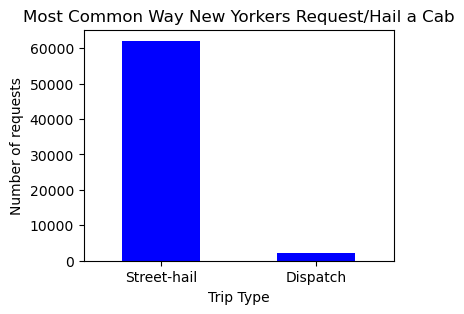

This chart represents the most common ways New Yorkers request/hail a cab. 
The x-axis represents the trip type: Street-hail and Dispatch. 
The y-axis represents the number of requests. 
Based on this graph, it is clear that the most common way New Yorkers request a cab is by street-hail as 
the bar for street-hail is over 60000 requests whiledispatch is less than 10000 requests.


In [45]:
# 1)

# Count the occurrences of each trip type (street-hail vs dispatch)
trip_type_counts = tripdata_df['trip_type'].value_counts()

plt.figure(figsize=(4, 3))
trip_type_counts.plot(kind='bar', color='blue')
plt.title('Most Common Way New Yorkers Request/Hail a Cab')
plt.xlabel('Trip Type')
plt.ylabel('Number of requests')
plt.xticks(ticks=range(len(trip_type_counts)), labels=['Street-hail', 'Dispatch'], rotation=0)
plt.show()
print("This chart represents the most common ways New Yorkers request/hail a cab. \nThe x-axis represents the trip type: Street-hail and"
     + ' Dispatch. \nThe y-axis represents the number of requests. \nBased on this graph, it is clear that the most common'
     + ' way New Yorkers request a cab is by street-hail as \nthe bar for street-hail is over 60000 requests while'
      + 'dispatch is less than 10000 requests.')

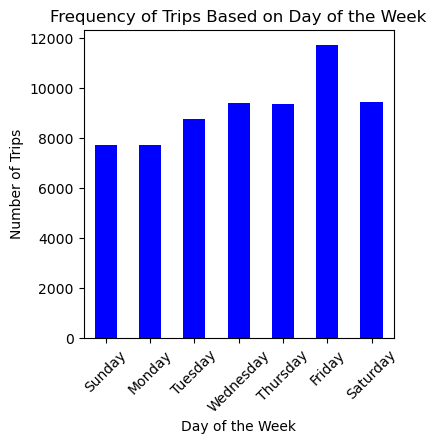

This chart represents the frequency of trips based on the day of the week. 
The x-axis represents the day of the week. 
The y-axis represents the number of trips. 
Based on this graph, there is a pattern in the frequency of trips based on the day of the week: Sunday and Monday 
have about the same number of trips, Tuesday has slightly more trips compared to Sunday and Monday, Wednesday 
and Thursday and Saturday have about the same number of trips and is slightly more than Tuesday, 
and Friday spikes the highest with the most number of trips.


In [46]:
# 2)

# Extract the days of the week
day_of_week_counts = tripdata_df['lpep_pickup_datetime'].dt.dayofweek.value_counts()

# Sort the days to become Sunday (6) to Saturday (0)
day_of_week_counts = day_of_week_counts.reindex([6, 0, 1,
                                                 2, 3, 4, 5])

# Map the number values to day names
day_of_week_counts.index = day_of_week_counts.index.map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
    3: 'Thursday', 4: 'Friday',
    5: 'Saturday', 6: 'Sunday'})

plt.figure(figsize=(4, 4))
day_of_week_counts.plot(kind='bar', color='blue')
plt.title('Frequency of Trips Based on Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

print("This chart represents the frequency of trips based on the day of the week. \nThe x-axis represents the day of the week. "
     + '\nThe y-axis represents the number of trips. \nBased on this graph, there is a pattern in the frequency of trips'
     + ' based on the day of the week: Sunday and Monday \nhave about the same number of trips, Tuesday has slightly more '
     + 'trips compared to Sunday and Monday, Wednesday \nand Thursday and Saturday have about the same number of trips and '
     + 'is slightly more than Tuesday, \nand Friday spikes the highest with the most number of trips.')

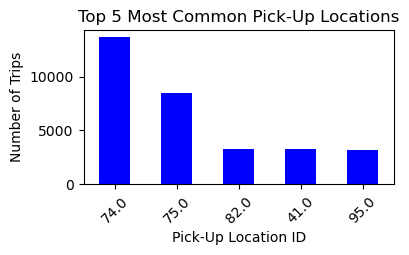

This chart represents the top 5 most common pick-up locations. 
The x-axis represents the pick-up location IDs with
 74.0, 75.0, 82.0, 41.0, and 95.0 being pick-up location IDs for the most common pick-up locations. 
The y-axis represents the number of trips. 
Based on the chart, pick-up location ID 74.0 is the most common pick-up location at over 10000 trips, 
then pick-up location ID 75.0 at about 8000 trips, 
then pick-up location IDs 82.0, 41.0, and 95.0 all have the 
least number of trips out of the top 5 at about 2500 each.


In [47]:
# 3)

# Count the occurrences of each pick-up location (PULocationID)
pickup_location_counts = tripdata_df['PULocationID'].value_counts()

# Select the top 5 most common pick-up locations
top_5_pickup_locations = pickup_location_counts.head(5)

plt.figure(figsize=(4, 2))
top_5_pickup_locations.plot(kind='bar', color='blue')
plt.title('Top 5 Most Common Pick-Up Locations')
plt.xlabel('Pick-Up Location ID')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

print('This chart represents the top 5 most common pick-up locations. \nThe x-axis represents the pick-up location IDs with\n '
     + '74.0, 75.0, 82.0, 41.0, and 95.0 being pick-up location IDs for the most common pick-up locations. \nThe y-axis '
     + 'represents the number of trips. \nBased on the chart, pick-up location ID 74.0 is the most common pick-up location '
     + 'at over 10000 trips, \nthen pick-up location ID 75.0 at about 8000 trips, \nthen pick-up location IDs 82.0, 41.0, and 95.0 '
     + 'all have the \nleast number of trips out of the top 5 at about 2500 each.')

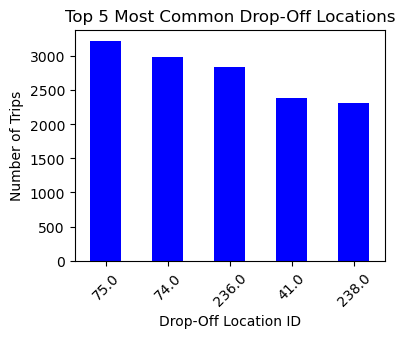

This chart represents the top 5 most common drop-off locations. 
The x-axis represents the drop-off location IDs with
 75.0, 74.0, 236.0, 41.0, and 238.0 being drop-off locations for the most common drop-off locations. 
The y-axis represents the number of trips. 
Based don the chart, drop-off location ID 75.0 is the most common drop-off location at over 3000 trips, 
then drop-off location ID 74.0 at about 3000 trips, then ID 236.0 at about 2800 trips, 
then ID 41.0 at about 2400 trips, and ID 238.0 at about 2300 trips.


In [48]:
# 4) the most common drop-off locations (display the top 5 locations).

# Count the occurrences of each drop-off location (DOLocationID)
dropoff_location_counts = tripdata_df['DOLocationID'].value_counts()

# Select the top 5 most common drop-off locations
top_5_dropoff_locations = dropoff_location_counts.head(5)

plt.figure(figsize=(4, 3))
top_5_dropoff_locations.plot(kind='bar', color='blue')
plt.title('Top 5 Most Common Drop-Off Locations')
plt.xlabel('Drop-Off Location ID')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

print("This chart represents the top 5 most common drop-off locations. \nThe x-axis represents the drop-off location IDs with\n "
     + '75.0, 74.0, 236.0, 41.0, and 238.0 being drop-off locations for the most common drop-off locations. \nThe y-axis '
     + 'represents the number of trips. \nBased don the chart, drop-off location ID 75.0 is the most common drop-off location '
     + 'at over 3000 trips, \nthen drop-off location ID 74.0 at about 3000 trips, then ID 236.0 at about 2800 trips, \nthen ID 41.0 at '
     + 'about 2400 trips, and ID 238.0 at about 2300 trips.')

## 7. Data Analysis (9 pts)
Write suitable code to answer the following:
1. Calculate the **range** of distances traveled by the green taxis. Then, compare the average distance with the shortest and longest distances. What insights can be drawn about travel using these taxis?
2. What is the most expensive and least expensive trip? 
3. What is the minimum, average and maximum **tip amount** for all trips that are 1) under 2 miles and 2) over 2 miles (i.e. >= 2)? 

Explain the results.

*`TIP`: If the answers from your analysis in this question contains erroneous or invalid numeric values, this means that the data needs to be cleaned to ensure that the analytical results are coherent.*

In [50]:
# 1)
# Finding most expensive trip
most_expensive = tripdata_df['total_amount'].max()

# Finding number of trips over 1000 miles
num_trips_over_1000_miles_count = tripdata_df[tripdata_df['trip_distance'] > 1000].shape[0]

# Finding number of trips under 1000 miles
num_trips_under_1000_miles_count = tripdata_df[tripdata_df['trip_distance'] < 1000].shape[0]


# Removing erroneous values from the data based on the most expensive trip by only considering trips
# under 1000 miles.
tripdata_df = tripdata_df[tripdata_df['trip_distance'] < 1000]
print('I removed trip distances over 1000 miles because there only ' + str(num_trips_over_1000_miles_count)
     + ' trips over 1000 miles compared to ' + str(num_trips_under_1000_miles_count)
     + ' trips under 1000 miles, \nwhich makes trips over 1000 miles seem like outliers, thus erroneous values.'
     + ' \nAdditionally, considering that the most expensive trip is only $' + str(most_expensive)
     + ' , \nthis makes the trips over 1000 miles seem even more unusual and potentially an incorrect value.')


# calculate minimum distance
min_distance = tripdata_df['trip_distance'].min()
# calculate maximum distance
max_distance = tripdata_df['trip_distance'].max()
# calculate average distance
avg_distance = tripdata_df['trip_distance'].mean()
# calculate range distance
range_distance = max_distance - min_distance

print("\nShortest distance traveled: " + str(min_distance) + " miles")
print("Longest distance traveled: " + str(max_distance) + " miles")
print("Average distance traveled: " + str(avg_distance.round(2)) + " miles")
print("The range distance traveled: " + str(range_distance) + " miles")

print("\nThe average distance is 2.89 miles and compared to the shortest distance traveled, 0.0 miles, \nthe average distance "
     + 'is 2.89 miles greater than the shortest distance. \nComparing the average distance to the longest distance traveled, '
     + 'the average distance is \n246.8 miles less compared to the longest distance traveled. \nA insight that can be '
     + 'drawn about travel using taxis is that even though there are travel distance \nat 0 miles and at 249.69 miles, '
     + 'there are more travel distance closer to the shortest distance because \nthe average distance traveled is 2.89 miles.'
     + ' Another insight that could be made is that since \nthe shortest distance traveled is 0.0 miles, there were trips '
     + 'that were extremely short.')

I removed trip distances over 1000 miles because there only 47 trips over 1000 miles compared to 64168 trips under 1000 miles, 
which makes trips over 1000 miles seem like outliers, thus erroneous values. 
Additionally, considering that the most expensive trip is only $1622.6 , 
this makes the trips over 1000 miles seem even more unusual and potentially an incorrect value.

Shortest distance traveled: 0.0 miles
Longest distance traveled: 249.69 miles
Average distance traveled: 2.88 miles
The range distance traveled: 249.69 miles

The average distance is 2.89 miles and compared to the shortest distance traveled, 0.0 miles, 
the average distance is 2.89 miles greater than the shortest distance. 
Comparing the average distance to the longest distance traveled, the average distance is 
246.8 miles less compared to the longest distance traveled. 
A insight that can be drawn about travel using taxis is that even though there are travel distance 
at 0 miles and at 249.69 miles, there are more

In [51]:
# 2

# Filter out rows where total_amount is less than 0 since total_amount should only be 0 or more
tripdata_df = tripdata_df[tripdata_df['total_amount'] >= 0]

# Find the most expensive and least expensive trips
most_expensive_trip = tripdata_df['total_amount'].max()
least_expensive_trip = tripdata_df['total_amount'].min()

# Display the results
print("The most expensive trip costs: $" + format(most_expensive_trip, ".2f"))
print("The least expensive trip costs: $" + format(least_expensive_trip, ".2f"))

print('After removing invalid numeric values, trips that costs less than $0.00, \nthe data shows that the '
     + 'most expensive trip costs $1622.60 compared to the least expensive trip that costs $0.00.')

The most expensive trip costs: $1622.60
The least expensive trip costs: $0.00
After removing invalid numeric values, trips that costs less than $0.00, 
the data shows that the most expensive trip costs $1622.60 compared to the least expensive trip that costs $0.00.


In [52]:
# 3 What is the minimum, average and maximum tip amount for all trips that are 1) under 2 miles and 2) over 2 miles (i.e. >= 2)?

# Filter trips for under 2 miles
trips_under_2_miles = tripdata_df[tripdata_df['trip_distance'] < 2]
# Filter trips for 2 miles or more
trips_2_or_more_miles = tripdata_df[tripdata_df['trip_distance'] >= 2]

# Calculate minimum tip amount for trips under 2 miles
min_tip_under_2 = trips_under_2_miles['tip_amount'].min()
# Calculate average tip amount for trips under 2 miles
avg_tip_under_2 = trips_under_2_miles['tip_amount'].mean()
# Calculate maximum  tip amount for trips under 2 miles
max_tip_under_2 = trips_under_2_miles['tip_amount'].max()

# Calculate minimum tip for trips 2 miles or more
min_tip_2_or_more = trips_2_or_more_miles['tip_amount'].min()
# Calculate average tip for trips 2 miles or more
avg_tip_2_or_more = trips_2_or_more_miles['tip_amount'].mean()
# Calculate maximum tip for trips 2 miles or more
max_tip_2_or_more = trips_2_or_more_miles['tip_amount'].max()

# Display results
print("Trips under 2 miles:")
print("  Minimum tip: $" + format(min_tip_under_2, ".2f"))
print("  Average tip: $" + format(avg_tip_under_2, ".2f"))
print("  Maximum tip: $" + format(max_tip_under_2, ".2f"))

print("\nTrips 2 miles or more:")
print("  Minimum tip: $" + format(min_tip_2_or_more, ".2f"))
print("  Average tip: $" + format(avg_tip_2_or_more, ".2f"))
print("  Maximum tip: $" + format(max_tip_2_or_more, ".2f"))

print('\nFor trips under 2 miles, the minimum tip was $0.00 while the maximum tip was $150.00, \nand the average tip was '
     + '$1.51, so that means more tips for trips under 2 miles were closer \nto the minimum than the maximum tip since '
     + '$1.51 is closer to $0.00 than $150.00.')
print('For trips 2 miles or more, The minimum tip was $0.00 while the maximum tip was $100.00, \nand the average tip was '
     + '$3.17, so that means more tips for trips 2 miles or more were also \ncloser to the minimum than the maximum tip since '
     + '$3.17 is closer to $0.00 than $100.00')
print('Comparing the tips for both categories, both had the same minimum tip of $0.00, \nthe maximum tip was higher for trips under '
     + '2 miles at $150.00 compared to $100.00 for trips 2 miles or more. \nThe average tip was higher for trips 2 miles or more '
     + 'at $3.17 compared to $1.51 for trips under 2 miles.')

Trips under 2 miles:
  Minimum tip: $0.00
  Average tip: $1.51
  Maximum tip: $150.00

Trips 2 miles or more:
  Minimum tip: $0.00
  Average tip: $3.17
  Maximum tip: $100.00

For trips under 2 miles, the minimum tip was $0.00 while the maximum tip was $150.00, 
and the average tip was $1.51, so that means more tips for trips under 2 miles were closer 
to the minimum than the maximum tip since $1.51 is closer to $0.00 than $150.00.
For trips 2 miles or more, The minimum tip was $0.00 while the maximum tip was $100.00, 
and the average tip was $3.17, so that means more tips for trips 2 miles or more were also 
closer to the minimum than the maximum tip since $3.17 is closer to $0.00 than $100.00
Comparing the tips for both categories, both had the same minimum tip of $0.00, 
the maximum tip was higher for trips under 2 miles at $150.00 compared to $100.00 for trips 2 miles or more. 
The average tip was higher for trips 2 miles or more at $3.17 compared to $1.51 for trips under 2 miles.


## 8. Findings (2 pts)
Based on the preliminary analysis, is this data a viable source that can be used by your team in the future to understand how New Yorkers use these taxis? Justify your response.

In [54]:
print('Based on my preliminary analysis of giving variables suitable types, handling missing values, handling invalid data, '
     + '\nand removing erroneous or invalid numeric values, such as outliers, I would consider this data a viable source '
     + '\nthat can be used by my team in the future to understand how New Yorkers use these taxis. I consider this a viable '
     + '\nsource of data because it has a large sample size, and has many variables. This source having a large same size '
     + '\nmakes this a viable source of data because it will allow for more precision and make it more likely that conclusions '
     + '\nwill hold since the analysis would be based on a large and representative data set compared to smaller data sets. '
     + '\nThis data having many variables will also make this a viable source because it will allow for more analysis on if '
     + '\nthere are relationships in the data, such as relationships between the variables total_amount and trip_distance.')

Based on my preliminary analysis of giving variables suitable types, handling missing values, handling invalid data, 
and removing erroneous or invalid numeric values, such as outliers, I would consider this data a viable source 
that can be used by my team in the future to understand how New Yorkers use these taxis. I consider this a viable 
source of data because it has a large sample size, and has many variables. This source having a large same size 
makes this a viable source of data because it will allow for more precision and make it more likely that conclusions 
will hold since the analysis would be based on a large and representative data set compared to smaller data sets. 
This data having many variables will also make this a viable source because it will allow for more analysis on if 
there are relationships in the data, such as relationships between the variables total_amount and trip_distance.
